<a href="https://colab.research.google.com/github/ZeroLeon/fastai_deploy_Bald_Checking/blob/master/Bald_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bald or not Bald
#秃还是不秃

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [0]:
#rm_name = 'not_bald.csv'
#rm = path/rm_name
#rm.rmdir()

In [0]:
path = Path('/content/data/hair_check2')

In [0]:
!cd '/content/data/hair_check2'

In [0]:
path.mkdir(parents=True, exist_ok=True)

In [0]:
folder_list = ['bald','not_bald']
classes = ['秃','不秃']

In [0]:
classes

['秃', '不秃']

In [0]:
file_list = ['bald_people.csv','not_bald.csv']

In [0]:
file_folder = dict(zip(folder_list,file_list))
file_folder
  

{'bald': 'bald_people.csv', 'not_bald': 'not_bald.csv'}

In [0]:
for folder in file_folder:
  print(folder)
  print(file_folder[folder])

bald
bald_people.csv
not_bald
not_bald.csv


In [0]:
#Function for create data files and folders
def folder_creator(file_list,folder_list,path):
  '''
  Take csv file name list, and folder name list, make those folders
  at the given path, download the file, return finished when done
  
  '''
  file_folder = dict(zip(folder_list,file_list))
  for folder in file_folder:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    file_name = file_folder[folder]
    print('downloading',file_name)
    download_images(path/file_name, path/folder , max_pics=600)
  print('finished') 
  
  

In [0]:
folder_creator(file_list,folder_list,path)

downloading bald_people.csv


downloading not_bald.csv


finished


In [0]:
path.ls()

[PosixPath('/content/data/hair_check2/not_bald'),
 PosixPath('/content/data/hair_check2/not_bald.csv'),
 PosixPath('/content/data/hair_check2/bald_people.csv'),
 PosixPath('/content/data/hair_check2/bald')]

In [0]:
for c in classes:
    print(c)
for b in folder_list:     
    verify_images(path/b, delete=True, max_size=500)

秃
不秃


In [0]:
!zip -r /content/data/hair_check2/hair_check.zip /content/data/hair_check2

In [0]:
np.random.seed(42)
data3 = ImageDataBunch.from_folder(path,valid_pct=0.2,
              ds_tfms=get_transforms(),size=299,num_workers=4,).normalize(imagenet_stats)

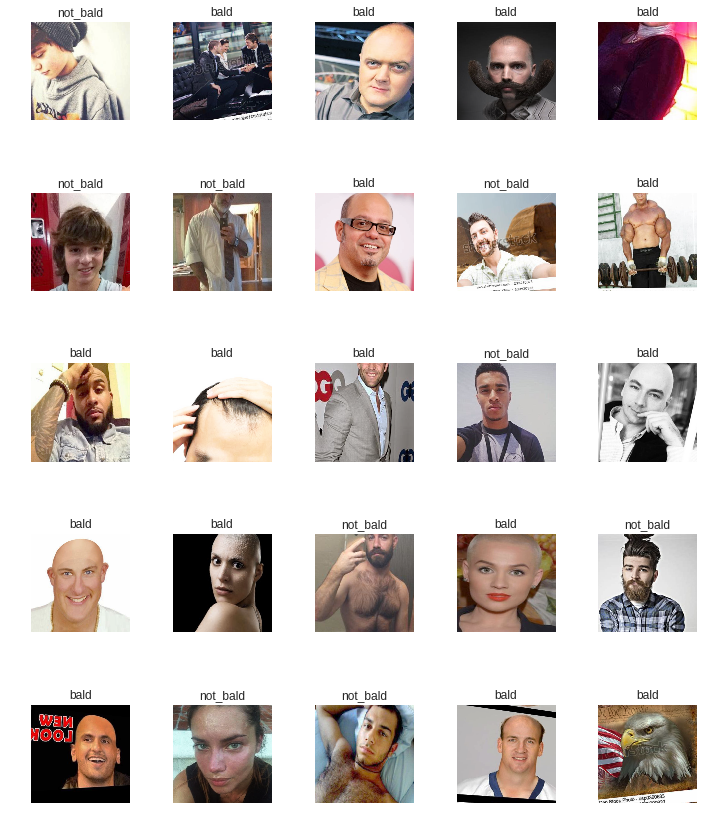

In [0]:
data3.show_batch(5,figsize=(10,12))

In [0]:
data2.classes,data2.c,len(data2.train_ds),len(data2.valid_ds)

(['bald', 'not_bald'], 2, 878, 219)

##Train Model

In [0]:
learn2 = cnn_learner(data3,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 87185988.13it/s]


In [0]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.623406,0.312522,0.127854,00:56
1,0.469937,0.263673,0.091324,00:37
2,0.368299,0.239435,0.086758,00:36
3,0.306754,0.228159,0.095890,00:36


In [0]:
learn2.save('/content/data/hair_check2/hair2_stage1')

In [0]:
learn2.export()

In [0]:
interp = ClassificationInterpretation.from_learner(learn2)

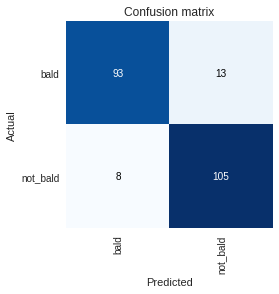

In [0]:
interp.plot_confusion_matrix()

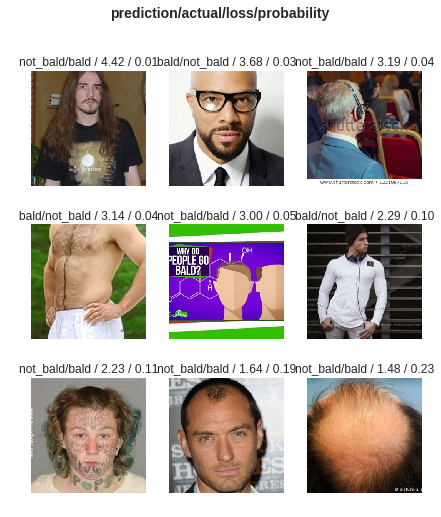

In [0]:
interp.plot_top_losses(9,figsize=(7,8),heatmap=False)

In [0]:
interp.most_confused(min_val=2)

[('bald', 'not_bald', 13), ('not_bald', 'bald', 9)]

In [0]:
img_name='not_bald_sample.jpeg'

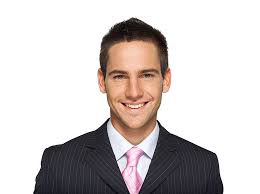

In [0]:
img = open_image(path/img_name)
img

In [0]:
pred_class,pred_idx,outputs = learn1.predict(img)
pred_class,pred_idx,outputs

(Category bald, tensor(0), tensor([0.5846, 0.4154]))

In [0]:
from fastai.widgets import *
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

new_dir = Path('/content/data/clean')
new_dir.mkdir(parents=True,exist_ok=True)
ds, idxs = DatasetFormatter().from_toplosses(learn1)

In [0]:
fd = ImageCleaner(ds, idxs, new_dir)

In [0]:
learn1.unfreeze()

In [0]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


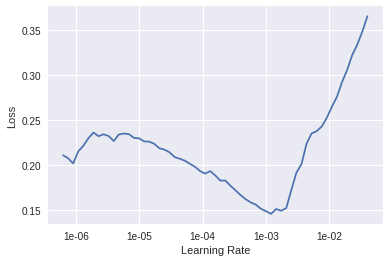

In [0]:
learn1.recorder.plot()

In [0]:
learn1.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.244932,0.234137,0.108108,00:06
1,0.200860,0.214249,0.108108,00:08


In [0]:
learn1.save('hair_stage2')

In [0]:
learn1.export()

##Export

In [0]:
learn1.load('/content/data/hair_check/hair_stage1')

In [0]:
learn1.export()

In [0]:
defaults.device = torch.device('cpu')

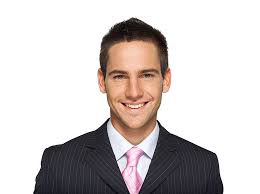

In [0]:
img = open_image(path/'not_bald_sample.jpeg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bald